<a href="https://colab.research.google.com/github/MeherBhaskar/CIFAR10_Classification/blob/master/CIFAR10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from __future__ import print_function
import keras
from keras.datasets import cifar10 
from keras.preprocessing.image import ImageDataGenerator

In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Image of [7]


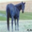

Image of [9]


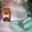

Image of [0]


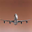

Image of [5]


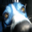

Image of [4]


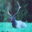

Image of [0]


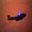

Image of [5]


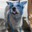

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

for i in range(0,7):
  rand = np.random.randint(0, len(x_train))
  image = x_train[rand]
  print('Image of {}'.format(str(y_train[rand])))
  title = 'Random Image {}'.format(str(i))
  cv2_imshow(image)


# Change Data Format

In [33]:
print(x_train.shape)
print('Shape after formating', x_train.shape)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train/=255
x_test/=255

(50000, 32, 32, 3)
Shape after formating (50000, 32, 32, 3)


In [34]:
from keras.utils import np_utils

num_classes = 10


y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

num_pixels = x_train.shape[1]*x_train.shape[2]


# Build and Train the Model

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

## Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 8, 8, 128)       

In [64]:


# Train the model

batch_size = 64
epochs = 1000

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test),
                    callbacks = [es])
score = model.evaluate(x_test, y_test, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 6s 121us/step - loss: 1.7706 - accuracy: 0.3576 - val_loss: 1.5283 - val_accuracy: 0.4507
Epoch 2/1000
50000/50000 [==============================] - 6s 118us/step - loss: 1.4391 - accuracy: 0.4829 - val_loss: 1.3179 - val_accuracy: 0.5299
Epoch 3/1000
50000/50000 [==============================] - 6s 118us/step - loss: 1.2736 - accuracy: 0.5466 - val_loss: 1.1897 - val_accuracy: 0.5773
Epoch 4/1000
50000/50000 [==============================] - 6s 117us/step - loss: 1.1483 - accuracy: 0.5936 - val_loss: 1.1628 - val_accuracy: 0.5926
Epoch 5/1000
50000/50000 [==============================] - 6s 118us/step - loss: 1.0525 - accuracy: 0.6299 - val_loss: 1.0494 - val_accuracy: 0.6279
Epoch 6/1000
50000/50000 [==============================] - 6s 117us/step - loss: 0.9542 - accuracy: 0.6655 - val_loss: 1.0074 - val_accuracy: 0.6520
Epoch 7/1000
50000/50000 [========================

In [65]:
print('Test Loss : {}'.format(score[0]))
print('Test Accuracy : {}'.format(score[1]))

Test Loss : 0.8714468361854554
Test Accuracy : 0.7071999907493591


# Plot loss, accuracy charts  

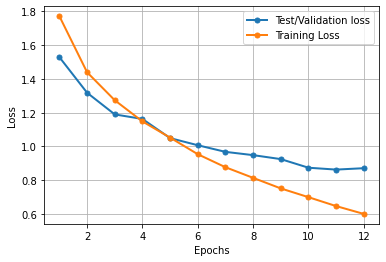

In [66]:
import matplotlib.pyplot as plt

history_dic = history.history

loss_vals = history_dic['loss']
val_loss_vals = history_dic['val_loss']
epochs = range(1, len(loss_vals)+1)

line1 = plt.plot(epochs, val_loss_vals, label = 'Test/Validation loss')
line2 = plt.plot(epochs, loss_vals, label = 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '.', markersize = 10)
plt.setp(line2, linewidth=2.0, marker = '.', markersize = 10)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

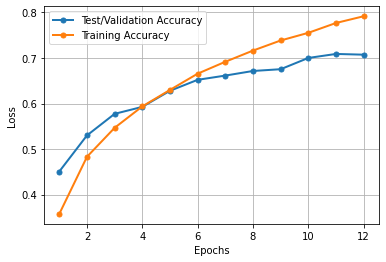

In [67]:
import matplotlib.pyplot as plt

history_dic = history.history

acc_vals = history_dic['accuracy']
val_acc_vals = history_dic['val_accuracy']
epochs = range(1, len(acc_vals)+1)

line1 = plt.plot(epochs, val_acc_vals, label = 'Test/Validation Accuracy')
line2 = plt.plot(epochs, acc_vals, label = 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '.', markersize = 10)
plt.setp(line2, linewidth=2.0, marker = '.', markersize = 10)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Model Visualization

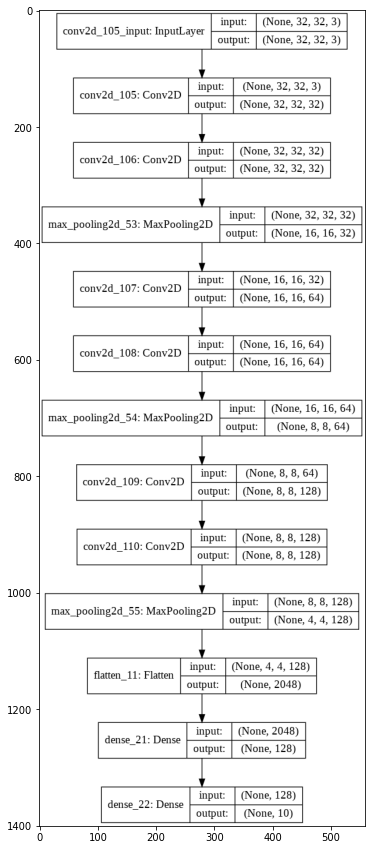

In [69]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

model_diag_path = '/content/sample_data/model_plot.png'

plot_model(model, to_file = model_diag_path, show_shapes=True, show_layer_names = True)

img = mpimg.imread(model_diag_path)
plt.figure(figsize = (30,15))
imgplot = plt.imshow(img)